In [2]:
import numpy as np
import torch 
import sys
sys.path.append("../")
import scipy 

import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
import xarray
# import utils_BayTIDE as utils
# from scipy.io import loadmat

In [3]:
data = pd.read_csv('../raw/movement-speeds-hourly-london-2020-1.csv.zip')

In [4]:
# data's column names
print(data.columns)


Index(['year', 'month', 'day', 'hour', 'utc_timestamp', 'segment_id',
       'start_junction_id', 'end_junction_id', 'osm_way_id',
       'osm_start_node_id', 'osm_end_node_id', 'speed_mph_mean',
       'speed_mph_stddev'],
      dtype='object')


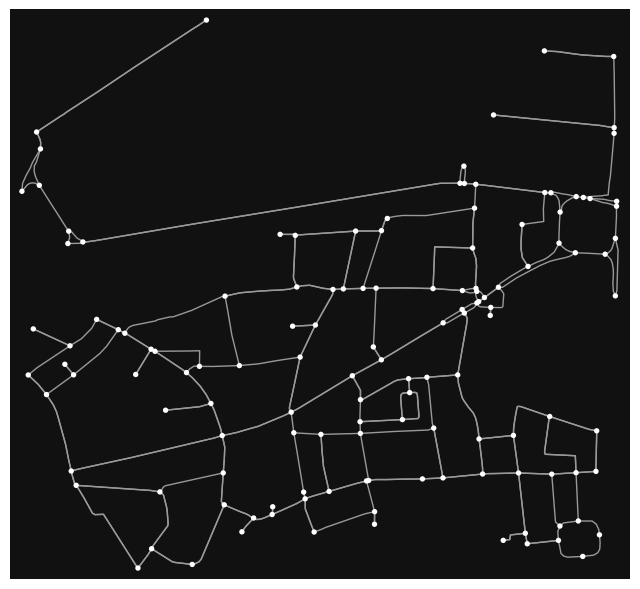

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [5]:
G1=ox.graph_from_point((51.499998, -0.1333328), dist=500,network_type='drive')
ox.plot.plot_graph(G1)

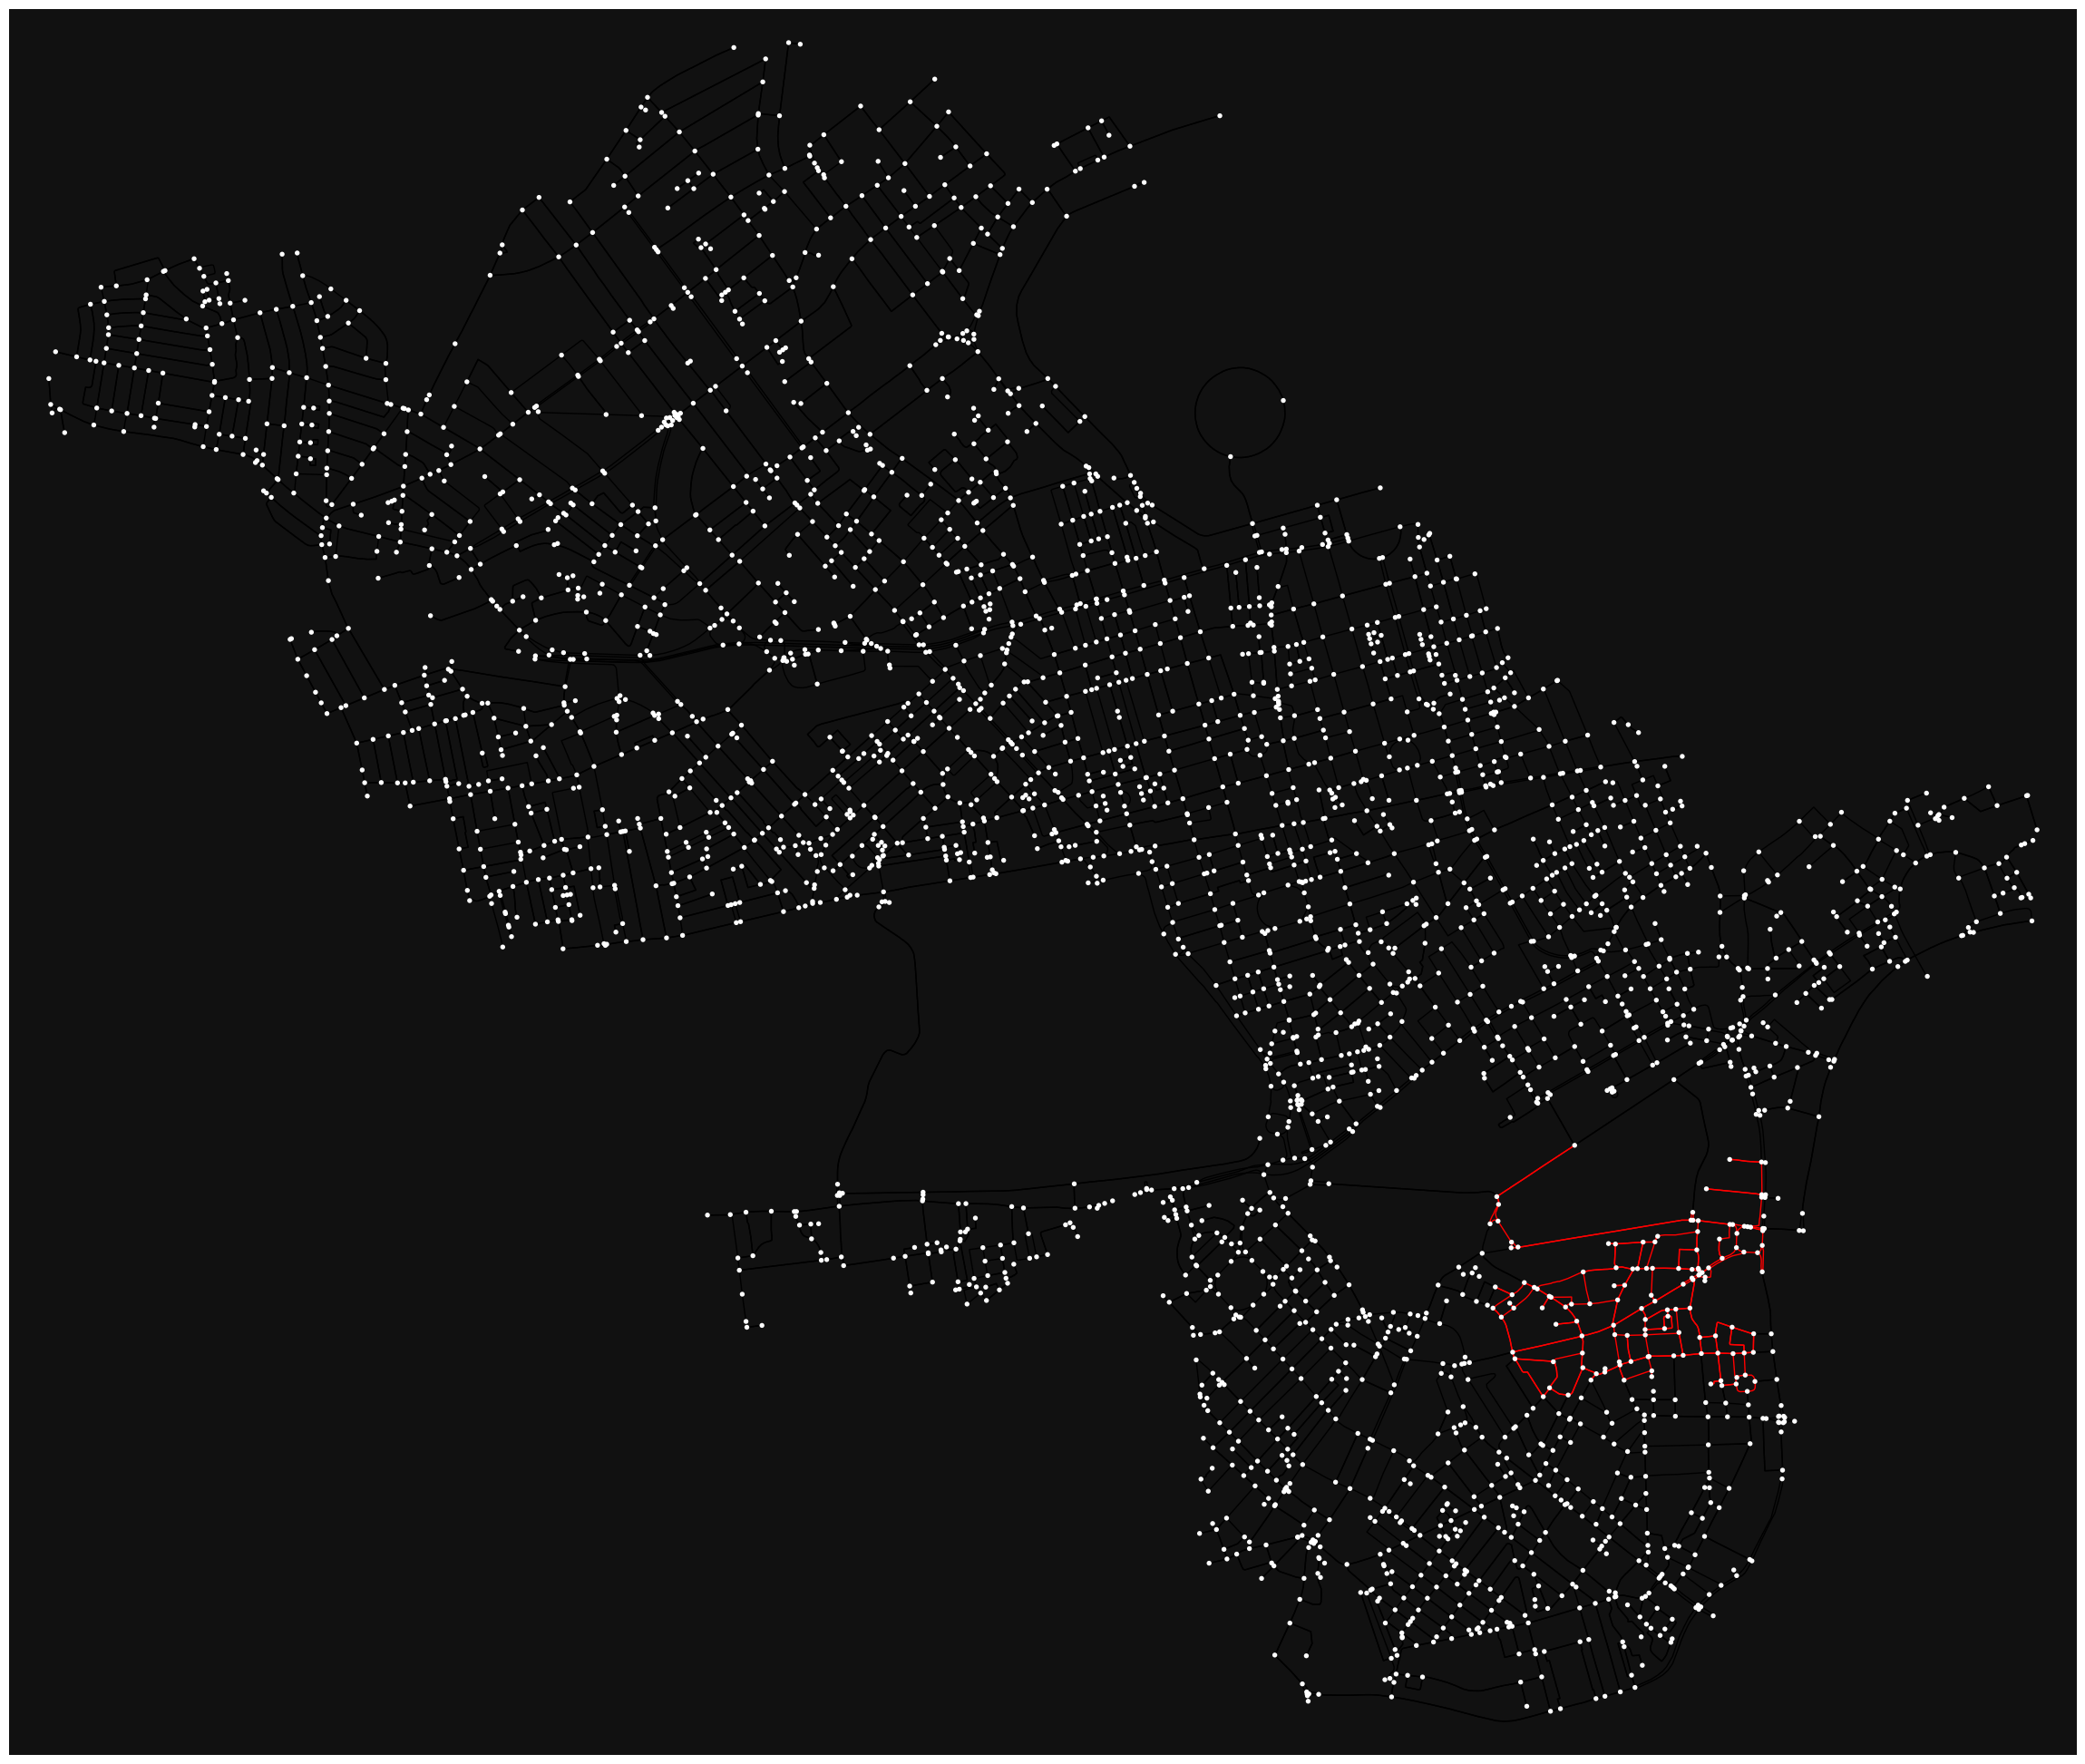

(<Figure size 10000x2500 with 1 Axes>, <AxesSubplot: >)

In [6]:
edge_color_lst=[]
G2 = ox.graph_from_place('Westminster', network_type='drive')
for i in G2.edges():
    if i in G1.edges:
        edge_color_lst.append('red')
    else:
        edge_color_lst.append('black')
ox.plot.plot_graph(G2,edge_color=edge_color_lst,figsize=(100,25))

In [7]:
# nodes, edges = ox.graph_to_gdfs(G1, nodes=True, edges=True)
nodes, edges = ox.graph_to_gdfs(G2, nodes=True, edges=True)

nodes

,y,x,street_count,highway,geometry
osmid,,,,,
99936,51.523611,-0.152791,3,NaN,POINT (-0.15279 51.52361)
99937,51.523018,-0.152024,3,NaN,POINT (-0.15202 51.52302)
101842,51.534050,-0.162666,3,NaN,POINT (-0.16267 51.53405)
101843,51.534932,-0.163688,4,NaN,POINT (-0.16369 51.53493)
101851,51.534497,-0.164464,3,NaN,POINT (-0.16446 51.53450)
...,...,...,...,...,...
10862477108,51.487067,-0.145332,1,NaN,POINT (-0.14533 51.48707)
10862496803,51.490920,-0.139342,3,NaN,POINT (-0.13934 51.49092)
10862501111,51.488147,-0.139562,3,NaN,POINT (-0.13956 51.48815)


In [8]:
nodes['osmid'] = nodes.index.values
#nodes添加一列 osmid
 
edges['osmid'] = edges.osmid.map(lambda x: x if isinstance(x, list) else [x])
#edges的osmid都变成list
 
u, v, _ = list(zip(*edges.index))
'''
目前edges的index是
MultiIndex([(    108094,    25632144, 0),
            (    108094,   610884816, 0),
            (    108097,      108293, 0),
            (    108097,      109849, 0)],
           names=['u', 'v', 'key'], length=284)
上面这一行代码的作用是把u,v,key分离出来
'''
 
edges["u"] = u
edges["v"] = v
edges['id'] = np.arange(edges.shape[0])
edges.set_index('id', inplace=True, drop=False)
#将id作为edges的活跃列（从0开始的数字）
 
edges

,osmid,name,highway,maxspeed,access,oneway,reversed,length,geometry,lanes,ref,bridge,junction,width,est_width,tunnel,service,u,v,id
id,,,,,,,,,,,,,,,,,,,,
0,[204647020],York Gate,unclassified,20 mph,permissive,False,False,8.052,"LINESTRING (-0.15279 51.52361, -0.15268 51.52363)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99936,2146383887,0
1,[233623258],York Gate,unclassified,20 mph,permissive,True,False,46.768,"LINESTRING (-0.15279 51.52361, -0.15294 51.523...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99936,4544836433,1
2,[18769878],Marylebone Road,trunk,20 mph,NaN,True,False,89.617,"LINESTRING (-0.15202 51.52302, -0.15221 51.523...",3,A501,NaN,NaN,NaN,NaN,NaN,NaN,99937,25470798,2
3,"[1067121866, 4257261]",York Gate,unclassified,20 mph,NaN,True,False,39.739,"LINESTRING (-0.15202 51.52302, -0.15232 51.523...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99937,200047,3
4,[4082717],Outer Circle,unclassified,20 mph,permissive,False,True,672.443,"LINESTRING (-0.16267 51.53405, -0.16278 51.533...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101842,101877,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,[1167976156],Cambridge Street,residential,20 mph,NaN,True,False,18.444,"LINESTRING (-0.13956 51.48815, -0.13951 51.488...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10862501111,10862501114,7487
7488,[1167976157],Cambridge Street,residential,20 mph,NaN,False,False,11.175,"LINESTRING (-0.13956 51.48815, -0.13950 51.488...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10862501111,10862501116,7488
7489,[740780564],Lupus Street,tertiary,20 mph,NaN,False,False,12.302,"LINESTRING (-0.13947 51.48799, -0.13929 51.48801)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10862501114,18130223,7489


In [9]:
triple = pd.concat([pd.DataFrame({'id': edges.id, 'u': edges.u, 'v': edges.v}),
                        pd.DataFrame({'id': edges.id, 'u': edges.v, 'v': edges.u})],
                       ignore_index=True)
triple
#从u射出来的边/从v射出来的边

,id,u,v
0,0,99936,2146383887
1,1,99936,4544836433
2,2,99937,25470798
3,3,99937,200047
4,4,101842,101877
...,...,...,...
14979,7487,10862501114,10862501111
14980,7488,10862501116,10862501111
14981,7489,18130223,10862501114
14982,7490,276673625,10862501114


In [10]:
#一条边两个方向
pairs = []
for (_, g) in triple.groupby('u'):
        pairs += [(u, v) for u in g.id for v in g.id if u != v]
for (_, g) in triple.groupby('v'):
        pairs += [(u, v) for u in g.id for v in g.id if u != v]
#同时从一个点出发\同时到达一个点的边
 
import networkx as nx
 
G = nx.Graph()
G.add_edges_from(pairs)
#根据点对关系确定图
 
 
nx.laplacian_matrix(G)

<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


<7492x7492 sparse matrix of type '<class 'numpy.int64'>'
	with 63600 stored elements in Compressed Sparse Row format>

In [11]:
df = data
sdf = df[df.osm_start_node_id.isin(nodes.osmid)&df.osm_end_node_id.isin(nodes.osmid)].copy()
sdf.drop(["segment_id", "start_junction_id", "end_junction_id"], axis=1, inplace=True)
sdf

,year,month,day,hour,utc_timestamp,osm_way_id,osm_start_node_id,osm_end_node_id,speed_mph_mean,speed_mph_stddev
59160,2020,1,31,9,2020-01-31T09:00:00.000Z,4259606,25378086,109845,14.435,2.083
59161,2020,1,22,10,2020-01-22T10:00:00.000Z,4259606,25378086,109845,14.691,3.366
59162,2020,1,17,10,2020-01-17T10:00:00.000Z,4259606,25378086,109845,15.340,2.196
59163,2020,1,28,10,2020-01-28T10:00:00.000Z,4259606,25378086,109845,18.944,7.627
59164,2020,1,31,8,2020-01-31T08:00:00.000Z,4259606,25378086,109845,16.428,4.898
...,...,...,...,...,...,...,...,...,...,...
41489276,2020,1,1,3,2020-01-01T03:00:00.000Z,509721267,25276644,1691695926,11.437,3.830
41489277,2020,1,1,2,2020-01-01T02:00:00.000Z,509721267,25276644,1691695926,12.080,5.375
41489278,2020,1,10,20,2020-01-10T20:00:00.000Z,509721267,25276644,1691695926,12.992,1.334
41489279,2020,1,6,17,2020-01-06T17:00:00.000Z,509721267,25276644,1691695926,14.222,1.906


In [12]:
edgeidmap = {(u, v): (osmid, edgeid) for (u, v, osmid, edgeid) in 
                 zip(edges.u, edges.v, edges.osmid, edges.id)}
edgeidmap

{(99936, 2146383887): ([204647020], 0),
 (99936, 4544836433): ([233623258], 1),
 (99937, 25470798): ([18769878], 2),
 (99937, 200047): ([1067121866, 4257261], 3),
 (101842, 101877): ([4082717], 4),
 (101842, 9221415719): ([19796011], 5),
 (101842, 101843): ([140635065, 35803578, 35803575], 6),
 (101843, 101842): ([140635065, 35803578, 35803575], 7),
 (101843, 293731967): ([642664885], 8),
 (101843, 101851): ([1024418085], 9),
 (101851, 21651600): ([25544594], 10),
 (101851, 101852): ([1024418085], 11),
 (101851, 101843): ([1024418085], 12),
 (101852, 21651599): ([8324892], 13),
 (101852, 1665707941): ([602749555, 1024418085], 14),
 (101852, 101851): ([1024418085], 15),
 (101870, 101872): ([6806591], 16),
 (101870, 810729427): ([41660674, 41660675, 605436076], 17),
 (101870, 194273): ([296895538, 224816870, 224816871], 18),
 (101872, 53744855): ([223883468], 19),
 (101873, 9857714893): ([6639808], 20),
 (101873, 2336607995): ([223883465], 21),
 (101877, 101842): ([4082717], 22),
 (10187

In [13]:
#辅助函数：根据u和v（起止节点），判断是否有对应的osmid，有的话返回edgeid
def getedgeid(u,v,osmid):
    # osmid_tmp,edgeid_tmp=edgeidmap.get((u,v),[-1],-1)
    osmid_tmp, edgeid_tmp = edgeidmap.get((u, v), ([-1], -1))

    #根据起止节点id，找寻对应的osmid和edgeid（如果没有返回-1）
    if(osmid in osmid_tmp):
        #表示起止节点id，对应的osmid三个可以唯一确定一个节点
        return edgeid_tmp
        #此时就返回这个节点的id
    else:
        return -1
        '''
        osmid_tmp=[-1] 表示根据起止节点找不到对应的osmid
        osmid不在osmid_tmp中，三者没法确定一段edge
        '''
sdf['edgeid']=sdf[['osm_start_node_id', 'osm_end_node_id', 'osm_way_id']].apply(lambda x:getedgeid(*x),axis=1)
sdf = sdf[sdf.edgeid >= 0]
sdf


,year,month,day,hour,utc_timestamp,osm_way_id,osm_start_node_id,osm_end_node_id,speed_mph_mean,speed_mph_stddev,edgeid
59160,2020,1,31,9,2020-01-31T09:00:00.000Z,4259606,25378086,109845,14.435,2.083,2132
59161,2020,1,22,10,2020-01-22T10:00:00.000Z,4259606,25378086,109845,14.691,3.366,2132
59162,2020,1,17,10,2020-01-17T10:00:00.000Z,4259606,25378086,109845,15.340,2.196,2132
59163,2020,1,28,10,2020-01-28T10:00:00.000Z,4259606,25378086,109845,18.944,7.627,2132
59164,2020,1,31,8,2020-01-31T08:00:00.000Z,4259606,25378086,109845,16.428,4.898,2132
...,...,...,...,...,...,...,...,...,...,...,...
41489276,2020,1,1,3,2020-01-01T03:00:00.000Z,509721267,25276644,1691695926,11.437,3.830,1942
41489277,2020,1,1,2,2020-01-01T02:00:00.000Z,509721267,25276644,1691695926,12.080,5.375,1942
41489278,2020,1,10,20,2020-01-10T20:00:00.000Z,509721267,25276644,1691695926,12.992,1.334,1942
41489279,2020,1,6,17,2020-01-06T17:00:00.000Z,509721267,25276644,1691695926,14.222,1.906,1942


In [14]:
sdf['datetime'] = sdf[['year', 'month', 'day', 'hour']].apply(lambda x: pd.datetime(*x), axis=1)
##每一行的年月日小时合并（eg，2019-07-01 14:00:00）
 
sdf= sdf[['edgeid', 'datetime', 'speed_mph_mean']].set_index(['edgeid', 'datetime'])
sdf

/tmp/ipykernel_3809232/4265072503.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  sdf['datetime'] = sdf[['year', 'month', 'day', 'hour']].apply(lambda x: pd.datetime(*x), axis=1)
/tmp/ipykernel_3809232/4265072503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['datetime'] = sdf[['year', 'month', 'day', 'hour']].apply(lambda x: pd.datetime(*x), axis=1)


speed_mph_mean
edgeid datetime                           
2132   2020-01-31 09:00:00          14.435
       2020-01-22 10:00:00          14.691
       2020-01-17 10:00:00          15.340
       2020-01-28 10:00:00          18.944
       2020-01-31 08:00:00          16.428
...                                    ...
1942   2020-01-01 03:00:00          11.437
       2020-01-01 02:00:00          12.080
       2020-01-10 20:00:00          12.992
       2020-01-06 17:00:00          14.222
       2020-01-01 04:00:00          13.130

[1047622 rows x 1 columns]

In [15]:
import xarray as xa
x=xa.DataArray.from_series(sdf.speed_mph_mean)
#将DataFrame的内容转换成时空矩阵
x

<xarray.DataArray 'speed_mph_mean' (edgeid: 2871, datetime: 744)>
array([[   nan,    nan,    nan, ..., 11.635,    nan,    nan],
       [   nan,    nan,    nan, ...,  5.092,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [16.262, 17.797, 17.482, ..., 19.144, 19.011, 21.312],
       [12.334,  8.624,  7.766, ..., 11.291, 13.952, 13.53 ],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan]])
Coordinates:
  * edgeid    (edgeid) int64 1 3 10 16 19 21 ... 7069 7070 7071 7072 7073 7079
  * datetime  (datetime) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00

In [16]:
missed_edges = np.setdiff1d(np.arange(edges.shape[0]), x.edgeid.values)
#一直没有出现过的边id
 
z = xa.DataArray(np.float32(np.nan), [('edgeid', missed_edges), 
                                          ('datetime', x.datetime.values)])
 
##一直没有出现过的边id组成的时空矩阵，数据都是NaN
 
x = xa.concat([x, z], dim='edgeid').rename({'edgeid': 's', 'datetime': 't'})
#两个DataArray 拼起来
 
 
x.sel(s=np.arange(edges.shape[0]))

<xarray.DataArray 'speed_mph_mean' (s: 7492, t: 744)>
array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ..., 11.635,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan]])
Coordinates:
  * s        (s) int64 0 1 2 3 4 5 6 7 ... 7485 7486 7487 7488 7489 7490 7491
  * t        (t) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00

In [17]:
arr=x.sel(s=np.arange(edges.shape[0])).values
arr = arr[:7489,:]
print(arr.shape)
# check nan ratio
print(np.isnan(arr).sum() / arr.size)

# generate obs mask, 1 for non-nan, 0 for nan
mask_obs = np.isnan(arr) == False

# check max and min mean of obs
print(arr[mask_obs].max(), arr[mask_obs].min(), arr[mask_obs].mean())

# replace nan with -1
arr[np.isnan(arr)] = -1

(7489, 744)
0.811978356787087
55.301 0.537 16.426499631546495


In [18]:
sub_tensor = arr

data_save = {}
data_save['ndims'] = sub_tensor.shape

data_save['raw_data'] = sub_tensor

data_save['data'] = []

# sorted unique timestamps, set as (normalized to 0-1 ) regular time intervals at current stage
data_save['time_uni'] = np.linspace(0,1,sub_tensor.shape[1])

def generate_random_mask( shape, drop_rate=0.2, valid_rate=0.1):
    """
    train_ratio: 1-valid_rate-drop_rate
    test_ratio: drop_rate
    valid_ratio: valid_rate
    """
    N,T = shape

    mask_train_list = []
    mask_test_list = []
    mask_valid_list = []

    for t in range(T):


        mask = np.random.rand(N)
        mask_train = np.where(mask>drop_rate+valid_rate, 1, 0)
        mask_test = np.where(mask<drop_rate, 1, 0)
        mask_valid = np.where((mask>drop_rate) & (mask<drop_rate+valid_rate), 1, 0)

        mask_obs_T = mask_obs[:,t]

        mask_train_list.append(mask_train*mask_obs_T)
        mask_test_list.append(mask_test*mask_obs_T)
        mask_valid_list.append(mask_valid*mask_obs_T)
    
    mask_train = np.stack(mask_train_list, axis=1)
    mask_test = np.stack(mask_test_list, axis=1)
    mask_valid = np.stack(mask_valid_list, axis=1)

    return mask_train, mask_test, mask_valid

fold = 5
drop_rate = 0.4
valid_rate = 0.1

for i in range(fold):
    mask_train, mask_test, mask_valid = generate_random_mask(sub_tensor.shape, drop_rate, valid_rate)
    data_save['data'].append({'mask_train':mask_train, 'mask_test':mask_test, 'mask_valid':mask_valid})

file_name = '../uber_impute'+'_r_%.1f'%(drop_rate)+'.npy'
np.save(file_name, data_save)


In [19]:
mask_train.sum() / mask_obs.sum()

0.49914186605474115